In [ ]:
import pandas as pd

In [ ]:
rab = pd.read_csv('события.csv') 
unique_values = rab['region_name'].unique().tolist()

unique_values

['Ставропольский край',
 nan,
 'Красноярский край',
 'Московская область',
 'Тульская область',
 'Удмуртская Республика',
 'Татарстан',
 'Санкт-Петербург',
 'Тверская область',
 'Мурманская область',
 'Коми.',
 'Приморский край',
 'Калужская область',
 'Новгородская область',
 'Ленинградская область',
 'Челябинская область',
 'Хабаровский край',
 'Северный Кавказ',
 'Вологодская область',
 'Краснодарский край',
 'Оренбургская область',
 'Рязанская область',
 'Саратовская область',
 'Республика Саха (Якутия)',
 'Архангельская область',
 'Республика Карелия',
 'Забайкальский край',
 'Ярославская область',
 'Калининградская область',
 'Республика Ингушетия',
 'Ульяновская область',
 'Воронежская область',
 'Северная Осетия',
 'Республика Мордовия',
 'Омская область',
 'Псковская область',
 'Дагестан',
 'Курганская область',
 'Новосибирская область',
 'Республика Бурятия',
 'Кировская область',
 'Ростовская область',
 'Волгоградская область',
 'Республика Адыгея',
 'Свердловская область',


In [ ]:
import re

SERVICE_PATTERN = re.compile(r'''
        # --- разные варианты слова "город" ---
        \bг(?:\.|\s|$)|                         # «г» или «г.»
        \bг\.\s*о\.?|                           # «г. о.»
        \bгород(?:-герой)?|                     # «город», «город-герой»
        \bгородские?\s+округа?|                 # «городской округ» и мн.ч.
        # --- аббревиатуры ---
        \bгор\.|                                # «гор.»
        \bр[-–]?н\.?|                           # «р-н» или «р-н.»
        \bмуниципальное?\s+образование|
        \bмо\b|                                 # «МО» (муниципальное образование)
        # --- район / округ одиночным словом в конце ---
        (?<=\s)район$|
        (?<=\s)округ$|
        # --- посёлки и ЗАТО ---
        \bрабочий\s+пос[её]л[о]к|
        \bпос[её]л[о]к\s+городского\s+типа|
        \bпос[её]л[о]к|
        \bЗАТО\b
    ''', re.I | re.X)

def extract_toponym(series: pd.Series) -> pd.Series:
    """Возвращает чистое название муниципалитета без служебных слов."""
    return (
        series
        .str.replace(SERVICE_PATTERN, '', regex=True)   # убираем служебные слова
        .str.replace(r'\s*\([^)]*\)', '', regex=True)   # убираем круглые скобки
        .str.replace(r'\s{2,}', ' ', regex=True)        # схлопываем пробелы
        .str.strip()                                    # убираем пробелы по краям
    )


df = pd.read_csv('население_работа.csv')
df['municipality'] = extract_toponym(df['municipality'])
df.to_csv('municipality_clean.csv', index=False)



,region_name,municipality,oktmo,year,active_percent,active_population_Всего,total_population_Всего
0,Алтайский край,Алейский муниципальный,1601000,2011,36.477038,24417.0,66938.0
1,Алтайский край,Алейский муниципальный,1601000,2012,35.633515,22468.0,63053.0
2,Алтайский край,Алейский муниципальный,1601000,2013,41.518388,32457.0,78175.0
3,Алтайский край,Алейский муниципальный,1601000,2014,41.086917,31549.0,76786.0
4,Алтайский край,Алейский муниципальный,1601000,2015,40.756032,30997.0,76055.0
...,...,...,...,...,...,...,...
30591,Ярославская область,Ярославский муниципальный,78650000,2019,50.446797,192959.0,382500.0
30592,Ярославская область,Ярославский муниципальный,78650000,2020,53.523412,223973.0,418458.0
30593,Ярославская область,Ярославский муниципальный,78650000,2021,53.474152,229033.0,428306.0
30594,Ярославская область,Ярославский муниципальный,78650000,2022,54.327118,243756.0,448682.0


In [ ]:

df = pd.read_csv('события.csv')


df['municipality'] = df.apply(
    lambda row: row['City'] if row['municipality'] == 'жилой' else row['municipality'],
    axis=1
)

df.to_csv('события.csv', index=False)


In [ ]:
from functools import reduce
import re
import pandas as pd

# 1. Шаблоны для очистки названий
LEAVE_PATTERN = re.compile(
    r'^(?:Городские\s+округа|Муниципальные\s+районы|'
    r'Городские\s+поселения|Сельские\s+поселения)\b',
    re.I
)

SERVICE_PATTERN = re.compile(r'''
    \bмуниципальный\s+(?:округ|район)\b  |  \bгородской\s+округ\b
  | \bим\.\s*                            |  \bсельсовет\b  |  \bсело\b
  | \b\d+[-–]й\b                        |  \bUD\b
  | \bмуниципальное?\s+образование\b    |  \bмуниципалитет\b  |  \bмо\b
  | \bр[-–]?н\.?                        |  (?<=\s)район$     |  (?<=\s)округ$
  | \bобласть\b                         |  \bкрай\b          |  \bреспублика\b
  | \bфедеральный\s+округ\b            |  \bавтономный\s+округ\b(?:\s*-\s*)?
  | \bавтономная\s+область\b
  | \bпос[её]л[о]к(?:\s+городского\s+типа)?|\bрабочий\s+пос[её]л[о]к|\bстаница\b|\bЗАТО\b
  | \bгород(?:-герой|-курорт)?\b|\bг\.?(?=\s|$)|\bгор\.(?=\s|$)
  | \bв\s+том\s+числе:
''', re.I | re.X)

def extract_toponym(series: pd.Series) -> pd.Series:
    """
    Преобразует наименования:
     – если match LEAVE_PATTERN → возвращает оригинал;
     – иначе отрезает служебные слова, скобки и лишние пробелы;
     – если после очистки строка начинается с 'имени ' → возвращает весь остаток;
     – иначе – только первое слово.
    """
    s = series.fillna('')
    leave = s.str.match(LEAVE_PATTERN)
    cleaned = (
        s
        .str.replace(SERVICE_PATTERN, '', regex=True)
        .str.replace(r'\s*\([^)]*\)', '', regex=True)
        .str.replace(r'\s{2,}', ' ', regex=True)
        .str.strip()
    )
    mask_imeni = cleaned.str.match(r'(?i)^имени\s+')
    first = cleaned.str.split(n=1).str.get(0).fillna('')
    result = first.where(~mask_imeni, cleaned)
    result = result.where(~leave, s)
    return result

# 2. Загружаем и очищаем справочник событий
events_df = pd.read_csv('события.csv', encoding='utf-8')
events_df['municipality'] = extract_toponym(events_df['municipality'])
events_df['region_name'] = events_df['region_name'].astype(str).str.strip()

# 3. Собираем справочник координат
coords_df = (
    events_df
    .loc[:, ['region_name', 'municipality', 'Latitude', 'Longitude']]
    .drop_duplicates(subset=['region_name', 'municipality'], keep='first')
)

# 4. Загружаем и очищаем датасет с протестами и событиями
protests_df = pd.read_csv('регрессия1.csv', encoding='utf-8')
protests_df['municipality_protest'] = extract_toponym(protests_df['municipality_protest'])
protests_df['municipality_event']   = extract_toponym(protests_df['municipality_event'])
protests_df['region_name_protest']  = protests_df['region_name_protest'].astype(str).str.strip()
protests_df['region_name_event']    = protests_df['region_name_event'].astype(str).str.strip()

# 5. Объединяем для координат «event»
coords_event = coords_df.rename(columns={
    'region_name':   'region_name_event',
    'municipality':  'municipality_event',
    'Latitude':      'Latitude_event',
    'Longitude':     'Longitude_event'
})
merged = protests_df.merge(
    coords_event,
    on=['region_name_event', 'municipality_event'],
    how='left',
    validate='many_to_one'
)

# 6. Объединяем для координат «protest»
coords_protest = coords_df.rename(columns={
    'region_name':   'region_name_protest',
    'municipality':  'municipality_protest',
    'Latitude':      'Latitude_protest',
    'Longitude':     'Longitude_protest'
})
merged = merged.merge(
    coords_protest,
    on=['region_name_protest', 'municipality_protest'],
    how='left',
    validate='many_to_one'
)

# 7. Фиксируем пары без координат
missing_event   = merged.loc[merged['Latitude_event'].isna(), ['region_name_event', 'municipality_event']].drop_duplicates()
missing_protest = merged.loc[merged['Latitude_protest'].isna(), ['region_name_protest', 'municipality_protest']].drop_duplicates()
print("Отсутствуют координаты для event:\n", missing_event)
print("Отсутствуют координаты для protest:\n", missing_protest)

# 8. Сохраняем финальный результат
# merged.to_csv('карта_регрессия1.csv', index=False)


Отсутствуют координаты для event:
     region_name_event municipality_event
0           Татарстан  Камско-Устьинский
16             Адыгея      Кошехабльский
24       Башкортостан     Большеокинский
27        Саратовская    Красноармейский
35        Костромская          Мантурово
47            Курская          Обоянский
55             Омская           Одесский
59        Вологодская         Нюксенский
63         Московская              Химки
67     Ставропольский          Дёминский
80         Удмуртская         Лынгинское
87        Челябинская        Карабашский
91    Калининградская           Янтарный
102         Чувашская        Янтиковский
110      Белгородская    Старооскольский
122          Марий Эл         Сернурский
126        Курганская             Курган
134       Кемеровская     Междуреченский
138       Костромская           Кострома
146         Калужская          Мещовский
154          Ненецкий     Великовисочный
158          Тверская          Пеновский
170       Саратовская 

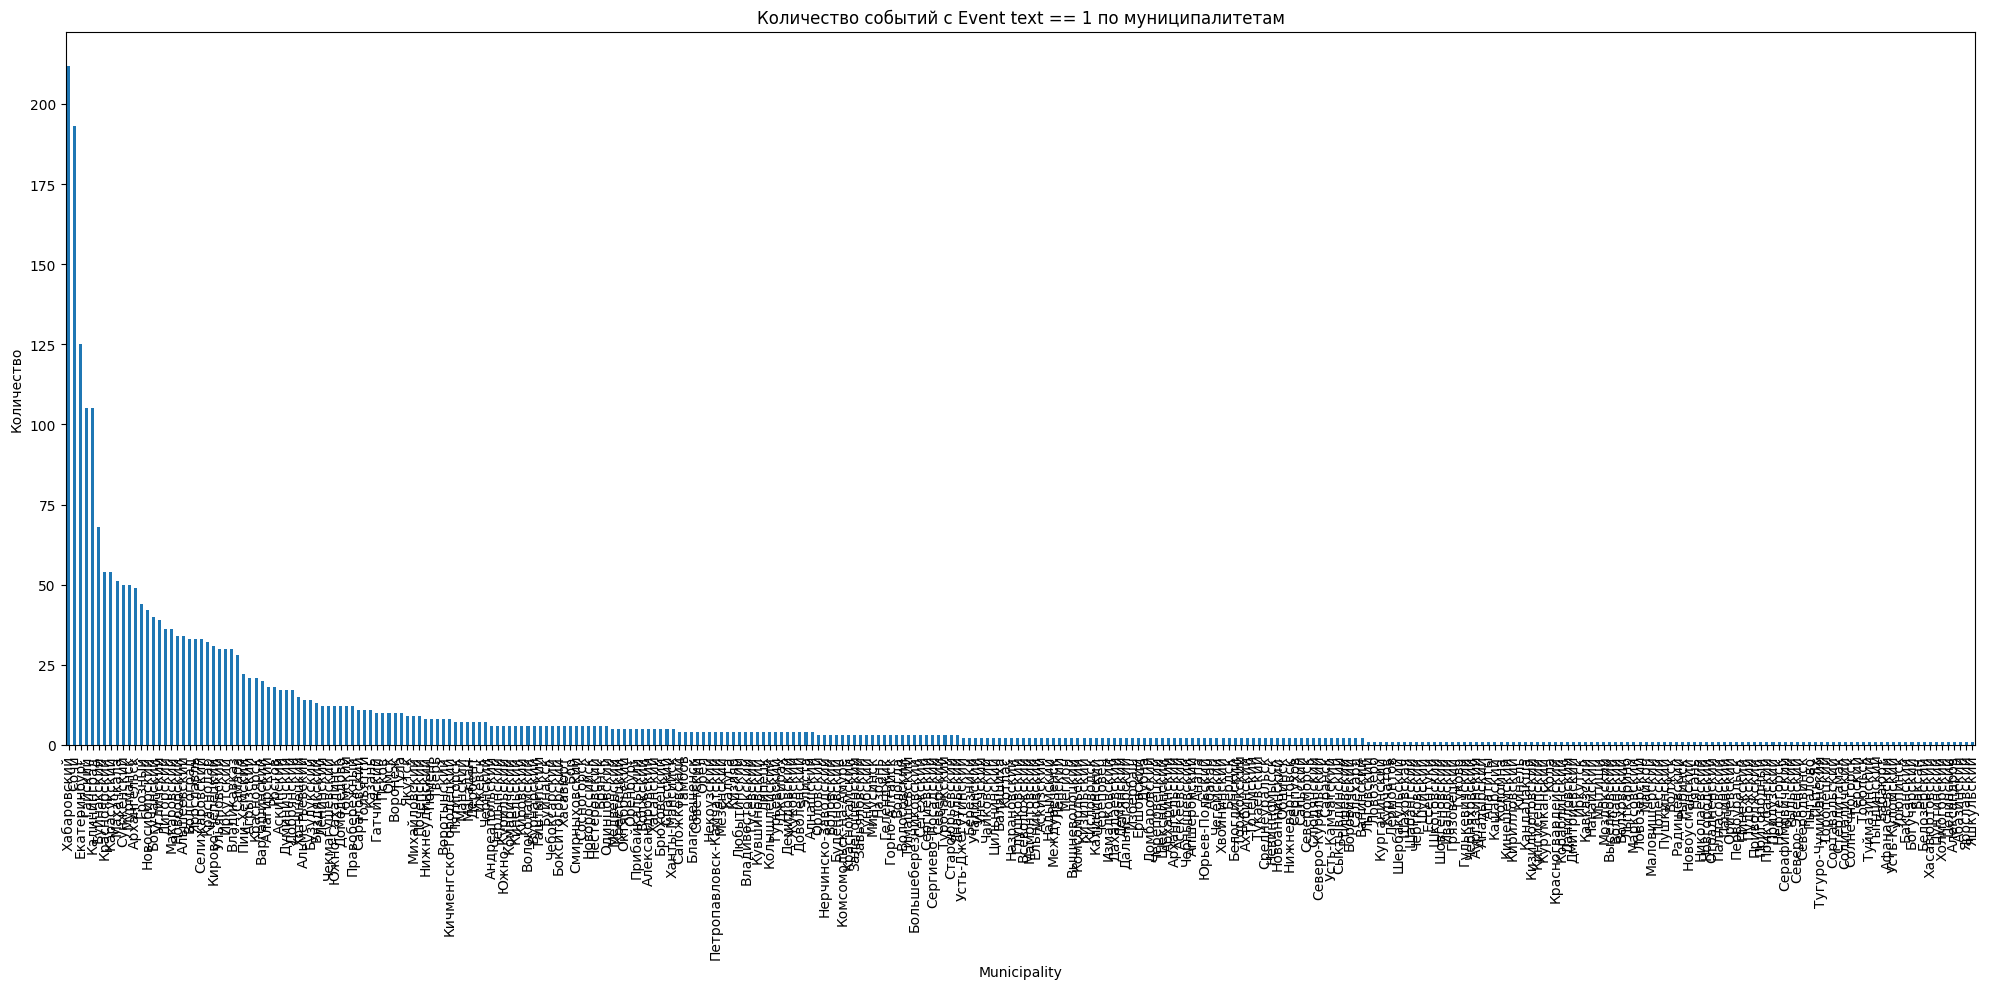

Процент региональных столиц среди всех строк с Event text == 1: 27.51%
Найденные региональные столицы: {'Псков', 'Тамбов', 'Махачкала', 'Южно-Сахалинск', 'Тюмень', 'Благовещенск', 'Оренбург', 'Волгоград', 'Иркутск', 'Калуга', 'Калининград', 'Тула', 'Элиста', 'Самара', 'Мурманск', 'Воронеж', 'Вологда', 'Краснодар', 'Саранск', 'Абакан', 'Орёл', 'Архангельск', 'Магадан', 'Омск', 'Тверь', 'Липецк', 'Грозный', 'Казань', 'Владикавказ', 'Горно-Алтайск', 'Салехард', 'Петропавловск-Камчатский', 'Якутск', 'Майкоп', 'Ярославль', 'Красноярск', 'Екатеринбург', 'Ханты-Мансийск', 'Брянск', 'Ижевск'}


In [ ]:

import matplotlib.pyplot as plt


data = pd.read_csv('общие_данные_регрессия1.csv')
protest_events = ["Demonstrate or rally", "Criticize or denounce", "Defy norms, law"]


filtered = data[data['Event Text'].isin(protest_events)]

# Шаг 3: Подсчет количества событий по муниципалитетам
municipality_counts = filtered['municipality'].value_counts()

# Визуализация
plt.figure(figsize=(20, 10))
municipality_counts.plot(kind='bar')
plt.title('Количество событий с Event text == 1 по муниципалитетам')
plt.xlabel('Municipality')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()


# Шаг 4: Функция для вычисления процента региональных столиц среди всех строк с Event text == 1
def percentage_regional_capitals(df):
    regional_capitals = {
        'Москва', 'Санкт-Петербург', 'Севастополь',
        # Республики
        'Майкоп', 'Грозный', 'Махачкала', 'Элиста', 'Нальчик', 'Черкесск', 'Владикавказ',
        'Кызыл', 'Абакан', 'Улан-Удэ', 'Якутск', 'Сыктывкар', 'Петрозаводск', 'Йошкар-Ола',
        'Саранск', 'Казань', 'Ижевск', 'Чебоксары', 'Горно-Алтайск',
        # Края
        'Пермь', 'Барнаул', 'Красноярск', 'Хабаровск', 'Владивосток', 'Петропавловск-Камчатский',
        'Ставрополь', 'Чита', 'Краснодар',
        # Области
        'Благовещенск', 'Архангельск', 'Астрахань', 'Белгород', 'Брянск', 'Владимир',
        'Волгоград', 'Вологда', 'Воронеж', 'Иваново', 'Иркутск', 'Калининград', 'Калуга',
        'Кемерово', 'Киров', 'Кострома', 'Курган', 'Курск', 'Липецк', 'Магадан', 'Мурманск',
        'Нижний Новгород', 'Великий Новгород', 'Новосибирск', 'Омск', 'Оренбург', 'Орёл',
        'Пенза', 'Псков', 'Ростов-на-Дону', 'Рязань', 'Самара', 'Саратов', 'Южно-Сахалинск',
        'Екатеринбург', 'Смоленск', 'Тамбов', 'Тверь', 'Томск', 'Тула', 'Тюмень', 'Ульяновск',
        'Челябинск', 'Ярославль',
        # Автономные округа и области
        'Нарьян-Мар', 'Салехард', 'Ханты-Мансийск', 'Анадырь', 'Биробиджан'
    }

    protest_events = ["Demonstrate or rally", "Criticize or denounce", "Defy norms, law"]


    filtered = df[df['Event Text'].isin(protest_events)]
    total_count = len(filtered)
    if total_count == 0:
        return 0, set()

    capitals_count = filtered['municipality'].isin(regional_capitals).sum()
    percent = (capitals_count / total_count) * 100

    capitals_found = set(filtered.loc[filtered['municipality'].isin(regional_capitals), 'municipality'].unique())
    return percent, capitals_found


percent, capitals = percentage_regional_capitals(data)
print(f"Процент региональных столиц среди всех строк с Event text == 1: {percent:.2f}%")
print(f"Найденные региональные столицы: {capitals}")



In [ ]:
data_new = pd.read_csv('регрессия3.csv')


regional_capitals = {
    'Москва', 'Санкт-Петербург', 'Севастополь',
    # Республики
    'Майкоп', 'Грозный', 'Махачкала', 'Элиста', 'Нальчик', 'Черкесск', 'Владикавказ',
    'Кызыл', 'Абакан', 'Улан-Удэ', 'Якутск', 'Сыктывкар', 'Петрозаводск', 'Йошкар-Ола',
    'Саранск', 'Казань', 'Ижевск', 'Чебоксары', 'Горно-Алтайск',
    # Края
    'Пермь', 'Барнаул', 'Красноярск', 'Хабаровск', 'Владивосток', 'Петропавловск-Камчатский',
    'Ставрополь', 'Чита', 'Краснодар',
    # Области
    'Благовещенск', 'Архангельск', 'Астрахань', 'Белгород', 'Брянск', 'Владимир',
    'Волгоград', 'Вологда', 'Воронеж', 'Иваново', 'Иркутск', 'Калининград', 'Калуга',
    'Кемерово', 'Киров', 'Кострома', 'Курган', 'Курск', 'Липецк', 'Магадан', 'Мурманск',
    'Нижний Новгород', 'Великий Новгород', 'Новосибирск', 'Омск', 'Оренбург', 'Орёл',
    'Пенза', 'Псков', 'Ростов-на-Дону', 'Рязань', 'Самара', 'Саратов', 'Южно-Сахалинск',
    'Екатеринбург', 'Смоленск', 'Тамбов', 'Тверь', 'Томск', 'Тула', 'Тюмень', 'Ульяновск',
    'Челябинск', 'Ярославль',
    # Автономные округа и области
    'Нарьян-Мар', 'Салехард', 'Ханты-Мансийск', 'Анадырь', 'Биробиджан'
}

# Функция для подсчёта процента региональных столиц по указанной колонке
def percent_regional_capitals_by_column(df, column_name):
    # Убираем пустые или NA значения
    df_filtered = df[df[column_name].notna()]

    total_count = len(df_filtered)
    if total_count == 0:
        return 0, set()

    capitals_count = df_filtered[column_name].isin(regional_capitals).sum()
    percent = (capitals_count / total_count) * 100
    capitals_found = set(df_filtered.loc[df_filtered[column_name].isin(regional_capitals), column_name].unique())

    return percent, capitals_found


percent_protest, capitals_protest = percent_regional_capitals_by_column(data_new, 'municipality_protest')
percent_event, capitals_event = percent_regional_capitals_by_column(data_new, 'municipality_event')

print(f"Процент региональных столиц в municipality_protest: {percent_protest:.2f}%")
print(f"Найденные региональные столицы в municipality_protest: {capitals_protest}\n")

print(f"Процент региональных столиц в municipality_event: {percent_event:.2f}%")
print(f"Найденные региональные столицы в municipality_event: {capitals_event}")


Процент региональных столиц в municipality_protest: 91.30%
Найденные региональные столицы в municipality_protest: {'Псков', 'Тамбов', 'Астрахань', 'Оренбург', 'Калининград', 'Самара', 'Нальчик', 'Ставрополь', 'Киров', 'Владимир', 'Архангельск', 'Омск', 'Тверь', 'Казань', 'Владикавказ', 'Курган', 'Ярославль', 'Екатеринбург', 'Ханты-Мансийск', 'Брянск', 'Ижевск'}

Процент региональных столиц в municipality_event: 4.72%
Найденные региональные столицы в municipality_event: {'Якутск'}
